# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output file (CSV):
output_data_file= 'output_data/cities.csv'

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
units = "metric"
url = f"http://api.openweathermap.org/data/2.5/weather?appid=cff17a915e99f1c471bd0cc562caac39&units=meteric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']-273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['timezone']

       # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | artyom
Processing Record 2 of Set 1 | dawson creek
Processing Record 3 of Set 1 | tambura
Processing Record 4 of Set 1 | taksimo
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | sur
Processing Record 10 of Set 1 | praxedis guerrero
Processing Record 11 of Set 1 | floro
Processing Record 12 of Set 1 | te anau
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | mogadishu
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | fairbanks
Processing Record 17 of Set 1 | ayan
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | kyshtovka
Processing Record 20 of Set 1 | olafsvik
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | pontes e lacerd

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,artyom,40.4723,50.3330,3.08,57,99,4.66,AZ,14400
1,dawson creek,55.7666,-120.2362,-8.20,67,75,2.06,CA,-25200
2,tambura,5.6000,27.4667,25.62,43,76,2.05,SS,7200
3,taksimo,56.3444,114.8794,-16.58,87,100,1.07,RU,28800
4,east london,-33.0153,27.9116,18.52,94,100,6.17,ZA,7200


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(20)

# format the Date column
from datetime import timezone
import datetime
import calendar  

dt = datetime.datetime.now(timezone.utc) 
utc_time = dt.replace(tzinfo=timezone.utc)
utc_timestamp = utc_time.timestamp()
ls = []
for item in city_data_df["Date"]:
    current_GMT = time.gmtime(item)
    ts = calendar.timegm(current_GMT)
    ls.append(int(ts*1000 + utc_timestamp))
city_data_df["Date"] = ls
city_data_df.head(20)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,artyom,40.4723,50.3330,3.08,57,99,4.66,AZ,1684620347
1,dawson creek,55.7666,-120.2362,-8.20,67,75,2.06,CA,1645020347
2,tambura,5.6000,27.4667,25.62,43,76,2.05,SS,1677420347
3,taksimo,56.3444,114.8794,-16.58,87,100,1.07,RU,1699020347
4,east london,-33.0153,27.9116,18.52,94,100,6.17,ZA,1677420347
5,rikitea,-23.1203,-134.9692,24.05,83,72,4.64,PF,1637820347
6,puerto ayora,-0.7393,-90.3518,20.86,91,73,2.24,EC,1648620347
7,sur,22.5667,59.5289,26.39,41,0,1.40,OM,1684620347
8,praxedis guerrero,31.3667,-106.0167,15.47,50,100,1.02,MX,1645020347


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

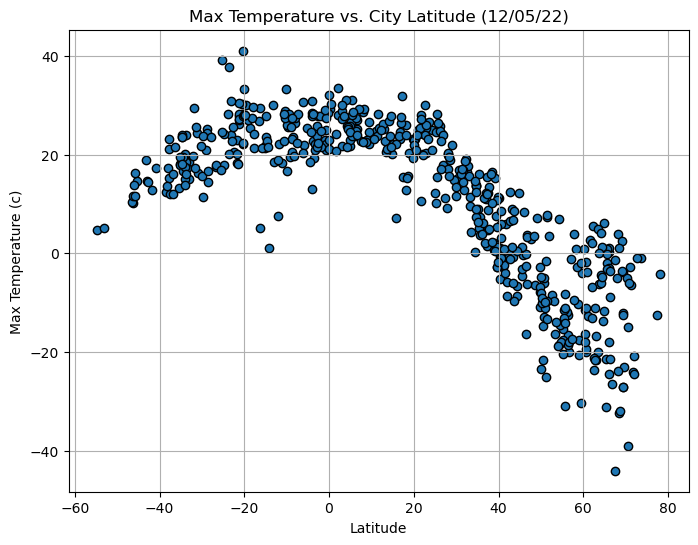

In [17]:

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Max Temp"],edgecolors="black")
dateofplot = time.strftime("%D", time.localtime(int(utc_timestamp)))

# Incorporate the other graph properties
plt.grid()
plt.title(f"Max Temperature vs. City Latitude ({dateofplot})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

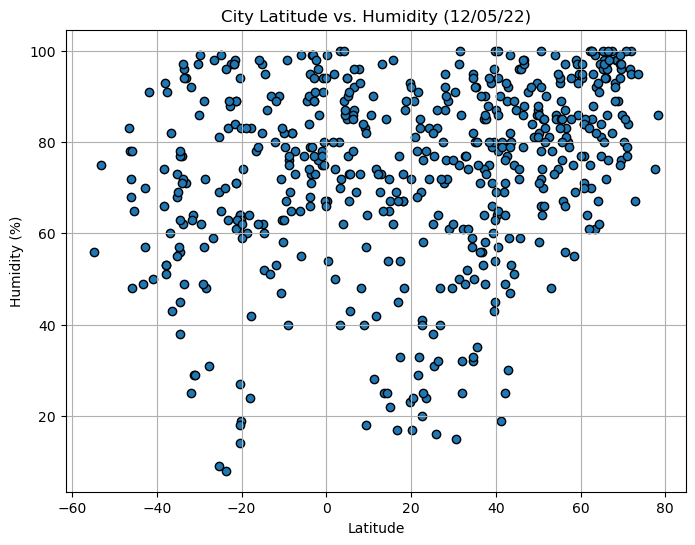

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Humidity"],edgecolors="black")
dateofplot = time.strftime("%D", time.localtime(int(utc_timestamp)))

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Humidity ({dateofplot})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

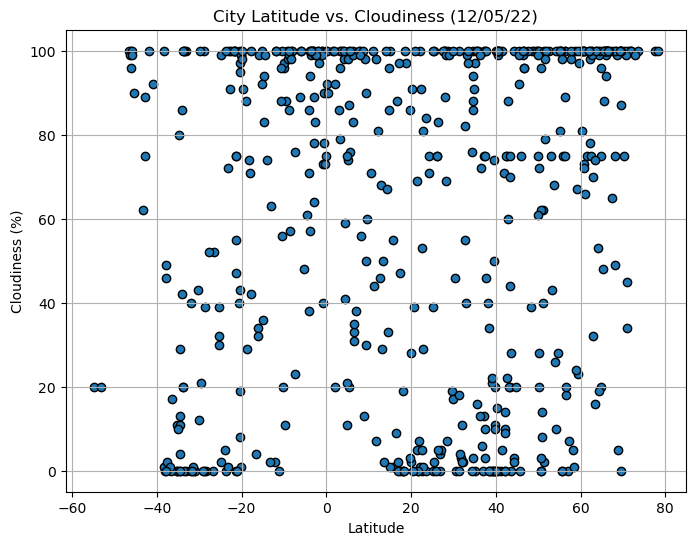

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Cloudiness"],edgecolors="black")
dateofplot = time.strftime("%D", time.localtime(int(utc_timestamp)))

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({dateofplot})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


     

#### Latitude vs. Wind Speed Plot

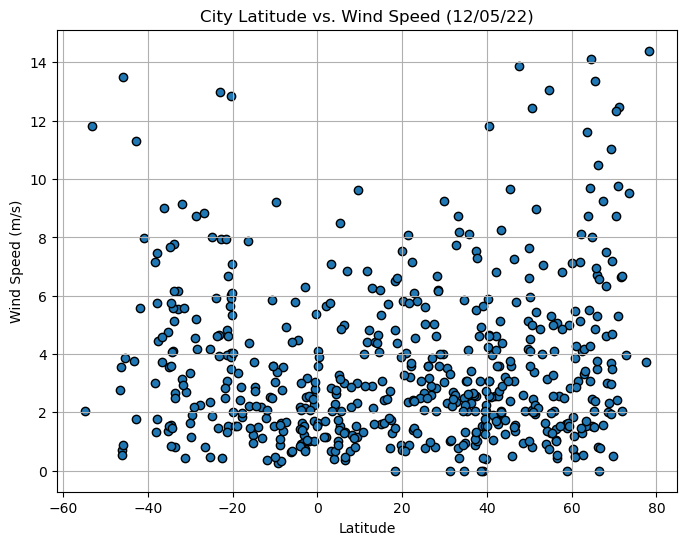

In [21]:

# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Wind Speed"],edgecolors="black")
dateofplot = time.strftime("%D", time.localtime(int(utc_timestamp)))

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({dateofplot})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def linreg(lat,vs,ylabel,xx,yy):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(lat, vs)
    regress_value = lat * slope + intercept
    eqtn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(8, 6))
    plt.scatter(x=lat, y=vs, edgecolors="black")
    plt.plot(lat, regress_value, "r-")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.annotate(eqtn,(xx,yy),fontsize=15,color="red")
    print(f"The r-value is : {rvalue**2}")
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,artyom,40.4723,50.3330,3.08,57,99,4.66,AZ,1684620347
1,dawson creek,55.7666,-120.2362,-8.20,67,75,2.06,CA,1645020347
2,tambura,5.6000,27.4667,25.62,43,76,2.05,SS,1677420347
3,taksimo,56.3444,114.8794,-16.58,87,100,1.07,RU,1699020347
7,sur,22.5667,59.5289,26.39,41,0,1.40,OM,1684620347


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,east london,-33.0153,27.9116,18.52,94,100,6.17,ZA,1677420347
5,rikitea,-23.1203,-134.9692,24.05,83,72,4.64,PF,1637820347
6,puerto ayora,-0.7393,-90.3518,20.86,91,73,2.24,EC,1648620347
10,te anau,-45.4167,167.7167,14.57,65,90,3.85,NZ,1717020347
16,atuona,-9.8000,-139.0333,25.49,79,11,9.21,PF,1636020347


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.751988139512949


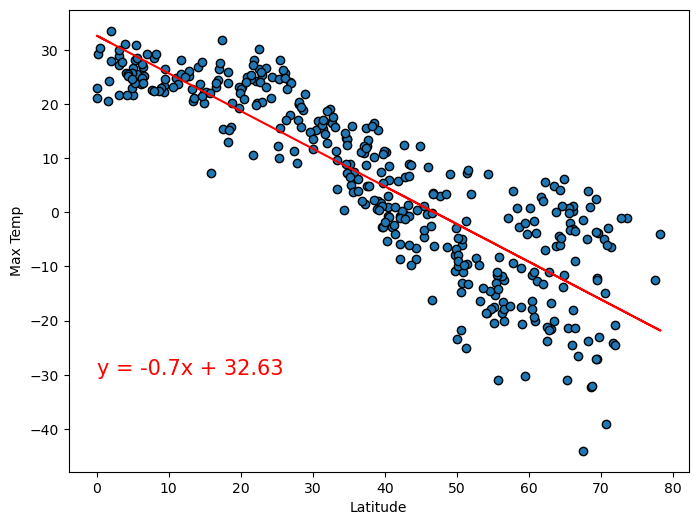

In [34]:
# Linear regression on Northern Hemisphere
linreg(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Max Temp",0,-30)


The r-value is : 0.25611592796099


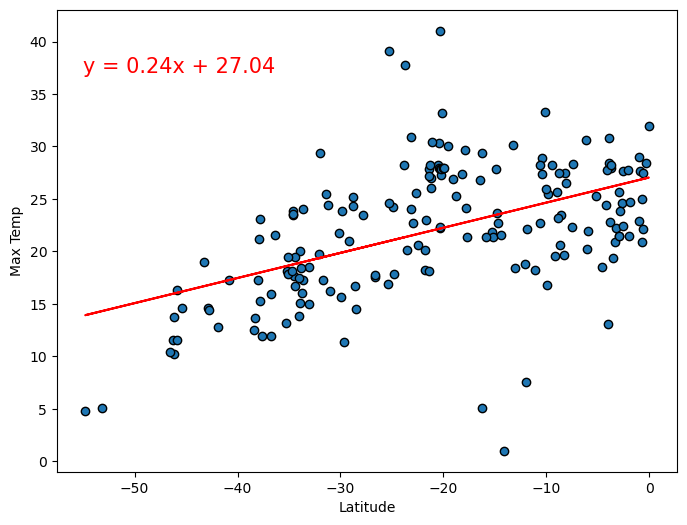

In [35]:
# Linear regression on Southern Hemisphere
linreg(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Max Temp",-55,37)

**Discussion about the linear relationship:** 
- In conclusion, by looking at the 2 scatterplots above we can notice that on Northern Hemisphere for greater latitudes, the maximum temperature decreases as latitude increases. On the other hand, for southern hemisphere, the maximum temperature increases as latitude increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.1075166845347503


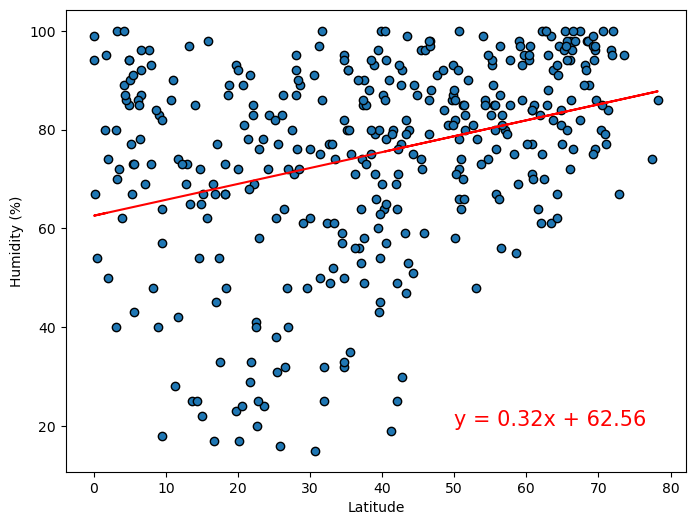

In [36]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Humidity (%)",50,20)

The r-value is : 0.05515122548431249


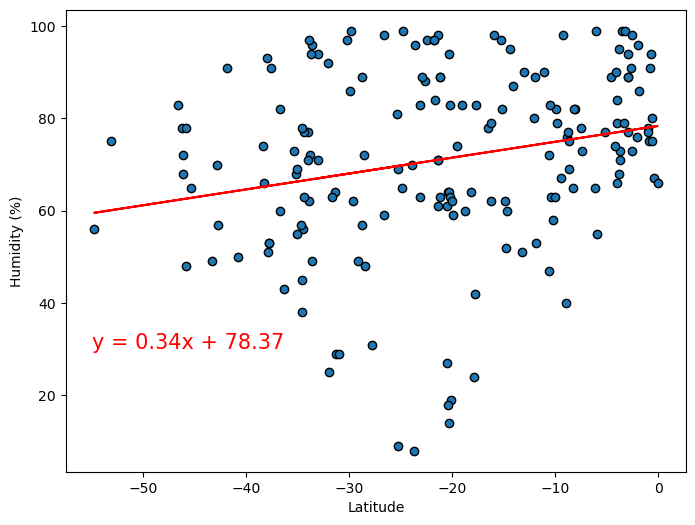

In [37]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Humidity (%)",-55,30)


**Discussion about the linear relationship:** 

- The 2 regression plot above shows that The humidity generally increase with the latitude in both southern and northern hemisphere. but also the relationship between the latitude and humidity is always going to be direct, doesn't matter if the city is on Northern or the Southern Hemisphere.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.02783338560749463


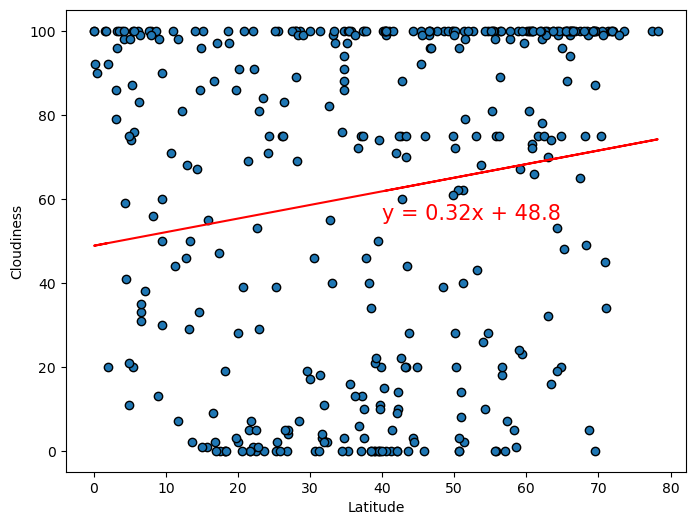

In [39]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Cloudiness",40,55)


The r-value is : 0.13384584917595227


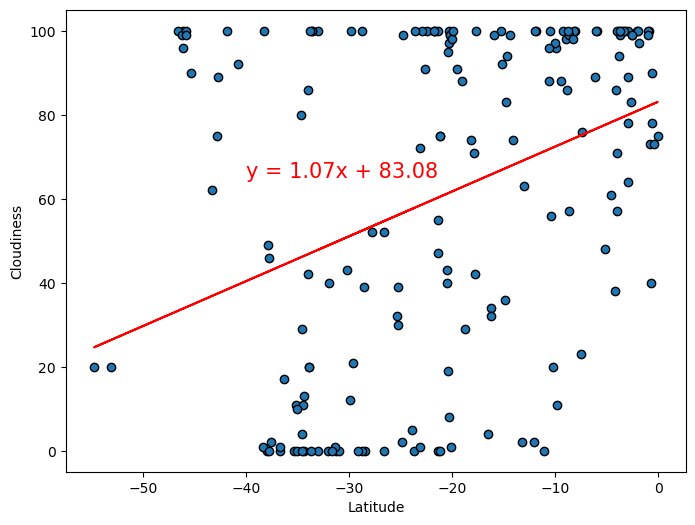

In [40]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Cloudiness",-40,65)


**Discussion about the linear relationship:** 

- The above graph can see that the relation with latitude and cloudiness for northern hemisphere has a weak relationship, As per the for southern hemisphere has a weak relation, but higher latitude along with more cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.04487379791475674


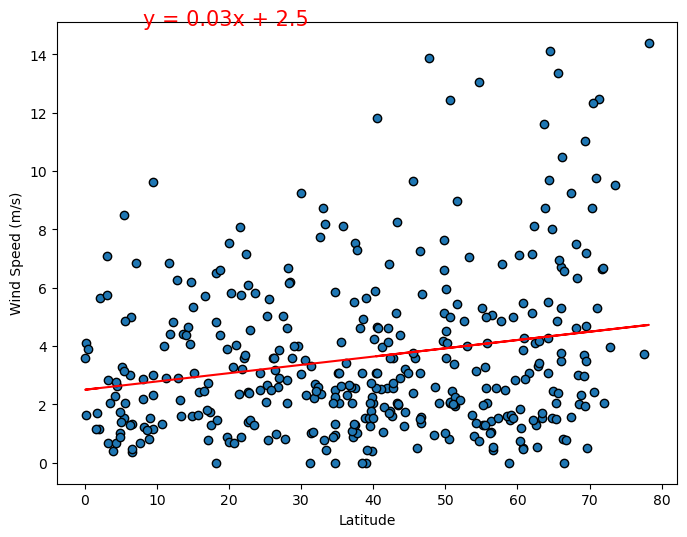

In [41]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Wind Speed (m/s)",8,15)


The r-value is : 0.11168171919978649


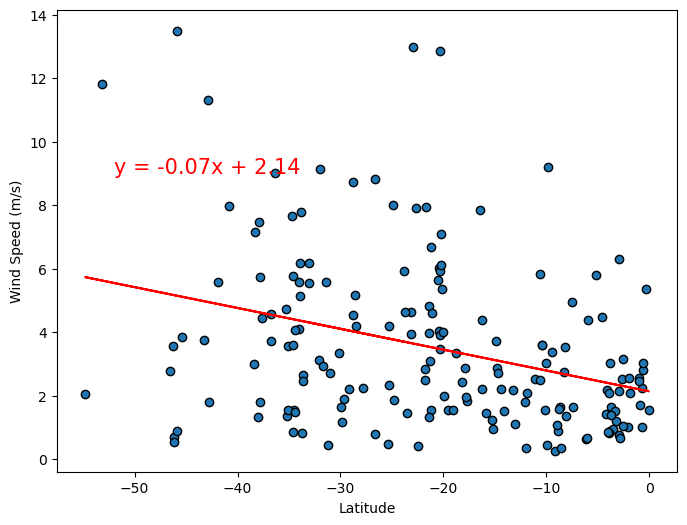

In [42]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Wind Speed (m/s)",-52,9)


**Discussion about the linear relationship:** 
- For Northern hemisphere, the wind speed increases with increasing latitude.
- For Southern hemisphere, the wind speed decreases with increasing latitude.